# Elevator Problem
Given a building with N amount of floors, we would like to calculate things like the average travel distance (measured in floors).

Since travelling by elevator has some interesting properties, for example:
- Almost in all cases, people travel from their floor of residence to the first floor and other way around.
- We can assume that travelling is symmetrical, i.e. people going out will always return.
- In rare cases, people travel between two different floors that don't involve first floor.
- People living on the second and third floor are likely to just use stairs instead, since waiting for elevator might often be longer that taking stairs.

All those properties of elevator travel impact the average path. This notebook will attempt to naively simulate that process, using multiple simplifications.

# Configuration & Probability Distribution

First, let's import useful modules:

In [114]:
import matplotlib.pyplot as plt
import random

Let's define the number of flats our simulated building will have:

In [115]:
NUMBER_OF_FLOORS = 10

Now, let's define some properties of travellers distribution. Those numbers have been selected by hand, instinctively, and might not represent reality.

To make it simple, it is assumed that:
- people don't travel between floors different than first floor and their floor of residence, i.e. people don't visit their neighbours :(
- people on the second floor don't use elevator at all.
- people on the third floor rarely use elevator.

Since travel is always between floor X and first floor, first floor will make up 50% of all travel destination/starting point.

In [116]:
FIRST_FLOOR_PROBABILITY = 0.5

# Predefined second floor probability
SECOND_FLOOR_PROBABILITY = 0

# This probability will reduce the probability of travelling from/to third floor.
THIRD_FLOOR_PROBABILITY_MODIFIER = 0.3

Based on our probabilities and probability modifiers, we can set up values in a list so we can see how the probability distribution looks on a graph.

In [117]:
# This is the remaining probability that can be assigned to other floors.
remaining_probability = 1 - FIRST_FLOOR_PROBABILITY - SECOND_FLOOR_PROBABILITY

# Number of floors that are left to assign probability.
# +1 means that 10-floor building is actually 11 floors: ground floor + 10 other floors.
remaining_floors = NUMBER_OF_FLOORS - 2

# We must now also calculate the probability of the third floor travel.
third_floor_probability = remaining_probability / remaining_floors * THIRD_FLOOR_PROBABILITY_MODIFIER

# And exclude it from remaining_probability.
remaining_probability -= third_floor_probability

# Which also means, number of remaining floors changed by one.
remaining_floors -= 1

# Declare the list of probabilities for floors.
floors = []
for floor in range(NUMBER_OF_FLOORS):
    match floor:
        case 0:
            floor_probability = FIRST_FLOOR_PROBABILITY
        case 1:
            floor_probability = SECOND_FLOOR_PROBABILITY
        case 2:
            floor_probability = third_floor_probability
        case _:
            floor_probability = remaining_probability / remaining_floors

    floors.append(floor_probability)

print(f"{floors=}")

floors=[0.5, 0, 0.01875, 0.06875, 0.06875, 0.06875, 0.06875, 0.06875, 0.06875, 0.06875]


Let's verify that the total probability is correct and makes up total of 1.
Since we are doing nasty floating point calculations, the answer won't be a perfect 1.

In [118]:
print(f"Total probability: {sum(floors)}")

Total probability: 0.9999999999999999


Our probability distribution looks like this:

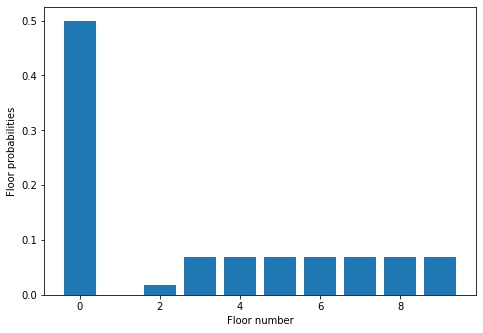

In [119]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(NUMBER_OF_FLOORS), floors)
plt.ylabel("Floor probabilities")
plt.xlabel("Floor number")
plt.show()

And that's it! Setup part is done!

## Simulation

So now, it's time to simulate random travelling. The process will look as following:
- if first floor is selected, then person travels to whatever floor he lives in.
- if any other floor is selected, the person has to travel to the first floor.

This means that floors distribution list, while nicely showing on the graph how it looks like, won't be that helpful in the simulation process. We will make a more straightforward approach here, where we either start from first floor or from other floors, except the first, and select a floor randomly. Otherwise, we start for any other floor and always go to first floor.

But! Since you can see the process is symmetrical (first floor -> random floor) or (random floor -> first floor), then we basically can just calculate it one way, assuming only one direction of travelling.

So, after all those simplifications, we just need to remember to calculate the length of the travels made.

First, let's once again define the probabilities, or "weights" in this case. This is pretty simple in this case: we exclude first and second floor from the equation, and then just apply a weight to the third floor.

In [120]:
# Define floors to which can we travel. Note that 0 = first floor (ground); 1 = second floor, etc.
destination_floors = range(2, NUMBER_OF_FLOORS)
# Define all the weights as equal.
weights = [1 for floor in destination_floors]
# Then, just use the probability modifier defined below to change the first value.
weights[0] = THIRD_FLOOR_PROBABILITY_MODIFIER

print(f"{weights=}")

weights=[0.3, 1, 1, 1, 1, 1, 1, 1]


With weights set, it's time to select random paths. Let's do this for 100_000 journeys total. You can change number of journeys up to your preference.

In [121]:
number_of_journeys = 100_000

destinations = random.choices(
    population=destination_floors,
    weights=weights,
    k=number_of_journeys
)

Now that we have our destinations, let's calculate their distances, sum them up and finally - find an average.
In our case, the destinations also represent the distance travelled in floors, e.g., a person that travelled from first floor (floor 0) to fourth floor (floor 3), travelled a total of 3 floors.

In [122]:
total_travel_distance = sum(destinations)
average_travel_distance = total_travel_distance / number_of_journeys
print(f"{average_travel_distance=}")

average_travel_distance=5.83372


And _voilà_! It seems that for a building with 10 floors (ground floor + 10 floors), the average travel distance is around 5.83 for our parameters (0.3 modifier for second floor, no travelling for first floor).

## Another example

Okay, that was pretty simple in its essence. Let's come up with a litle bit more complex example:
- first floor stays as before
- people rarely travel to/from second floor
- people sometimes travel to/from third floor.
- people often, but not always, travel to/from fourth floor.

For that, we will define different weights/floor modifiers.

In [123]:
SECOND_FLOOR_PROBABILITY_MODIFIER = 0.1
THIRD_FLOOR_PROBABILITY_MODIFIER = 0.5
FOURTH_FLOOR_PROBABILITY_MODIFIER = 0.85

# Define floors to which can we travel. Note that 0 = first floor (ground); 1 = second floor, etc.
destination_floors = range(1, NUMBER_OF_FLOORS)
# Define all the weights as equal.
weights = [1 for floor in destination_floors]
# Then, just use the probability modifier defined below to change the first value.
weights[0] = SECOND_FLOOR_PROBABILITY_MODIFIER
weights[1] = THIRD_FLOOR_PROBABILITY_MODIFIER
weights[2] = FOURTH_FLOOR_PROBABILITY_MODIFIER

print(f"{weights=}")

weights=[0.1, 0.5, 0.85, 1, 1, 1, 1, 1, 1]


And here's the result:

In [124]:
number_of_journeys = 100_000

destinations = random.choices(
    population=destination_floors,
    weights=weights,
    k=number_of_journeys
)

total_travel_distance = sum(destinations)
average_travel_distance = total_travel_distance / number_of_journeys
print(f"{average_travel_distance=}")

average_travel_distance=5.726


## Play with it yourself!
In this case, the results are similar. What if we have 200 floors, however? Or use different modifiers?

Go and change whatever you want!

In [125]:
NUMBER_OF_FLOORS = 200

SECOND_FLOOR_PROBABILITY_MODIFIER = 0.1
THIRD_FLOOR_PROBABILITY_MODIFIER = 0.5
FOURTH_FLOOR_PROBABILITY_MODIFIER = 0.85

# Define floors to which can we travel. Note that 0 = first floor (ground); 1 = second floor, etc.
destination_floors = range(1, NUMBER_OF_FLOORS)
# Define all the weights as equal.
weights = [1 for floor in destination_floors]
# Then, just use the probability modifier defined below to change the first value.
weights[0] = SECOND_FLOOR_PROBABILITY_MODIFIER
weights[1] = THIRD_FLOOR_PROBABILITY_MODIFIER
weights[2] = FOURTH_FLOOR_PROBABILITY_MODIFIER

number_of_journeys = 100_000

destinations = random.choices(
    population=destination_floors,
    weights=weights,
    k=number_of_journeys
)

total_travel_distance = sum(destinations)
average_travel_distance = total_travel_distance / number_of_journeys
print(f"{average_travel_distance=}")

average_travel_distance=100.60165


For 200 floors and 0.1/0.5/0.85 modifiers, the average travel distance is 100.95.

Let's actually plot the distribution of distances!

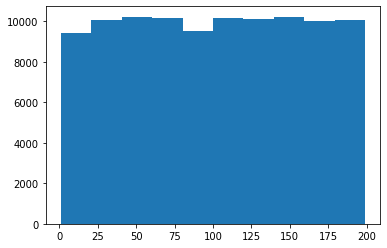

In [126]:
plt.hist(destinations)
plt.show()

As you can see, as the number of floors grows, the fact that people at the very low floors won't use the elevator has less and less impact.

It's important to note, however, than in a building of 200 floors and only one elevator, the amount of people at the lower floors that would pick stairs over elevator would grow significantly.

## Summary

And that's it! I realize this is very basic, just-having-some-fun type of notebook with no realistic probabilities and huge simplifications.

Project of this purpose was to solidify some thoughts about the way people move in elevators and to play a little with Jupyter Notebooks.

If you somehow stumble upon this (and probably find it boring), I actually recommend a read on the actual statistical problem associated with elevators: [Traffic_calculations](https://en.wikipedia.org/wiki/Elevator#Traffic_calculations)

